# 웹 데이터 수집

* Last updated: 20170325 20161004

## 1.1 학습내용

### 1.1.1 목표

* 웹 페이지를 크롤링해서 가져올 수 있다.
* 가져온 웹 페이지에서 데이터를 가져올 수 있다.

### 1.1.2 목차

* 1.2 웹으로 나가기
* 1.2.1 웹데이터란?
* 1.2.2 웹 데이터 가져오기
* 1.3 uri
* 1.3.1 domain
* 1.3.2 params
* 1.4 url 가져오기
* 1.4.1 library
* 1.4.2 HTTP errors
* 1.5 BeautifulSoup

### 1.1.3 문제

* 웹데이터-1: python.org 페이지를 크롤링해서 http url를 출력하기


## 1.2 웹으로 나가기

### 1.2.1  웹데이터란?

* 웹은 클라이언트와 서버로 구성된다.
    * 웹클라이언트
        * 웹클라이언트는 보통 웹브라우저를 말한다. Chrome, Internet Explorer, Firefox
        * 웹서버에서 html을 전송하면, 이를 받아서 브라우저에 보여준다.
    * 웹서버
        * 웹서버는 보통 http 서버를 말한다. Microsoft's IIS, Apache server
        * 웹서버는 보통 원격에 위치하며, http 통신을 하기 위해 설치된 소프트웨어를 말한다.

* 웹데이터는 웹 사이트에서 추출된 정보를 말한다.
    * 웹데이터는 웹 사이트에서 http통신으로 교환되는 데이터를 말한다.
    * 데이터를 추출하는 것을 마이닝 (mining), 스크레이핑 (scraping), 크롤링 (crawling)이라고 한다.
    * 웹에서 추출하는 것을 밝혀 앞에 웹을 넣어 웹마이닝, 웹크롤링, 웹스크레이핑이라고도 한다.
    * 서버가 반환하는 웹데이터는 보통 html, xml, json 형식을 가진다.

* http
    * http (HpyerText Transfer Protocol)는 웹프로토콜, 서로 데이터를 주고 받는 약속이다.
    * socket 80번 포트를 사용한다.
    * request(s)로 요청하고, response(s)를 반환한다.

In [1]:
import iplantuml

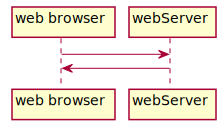

In [4]:
%%plantuml

@startuml
"web browser" -> webServer
webServer -> "web browser"
@enduml

###  1.2.2 웹 데이터 가져오기

* 웹페이지에서 필요한 정보를 추출하는 과정, 크롤링을 프로그램으로 자동화할 수 있다.
* 웹클라이언트에서 웹페이지를 여는 경우:
    * 자신의 컴퓨터에서(클라이언트) 웹브라우저를 열어서 주소창에 웹주소를 입력하고,
    * 네트워크를 통해 서버에 요청(Requests)하고, 웹페이지를 반환(Responses) 받고,
    * 반환된 페이지 html을 스타일에 따라 브라우저에 표현한다. 이를 렌더링 (rendering)이라고 한다.
    * html은 그대로 읽기가 불편하기 때문에, 웹브라우저를 사용하여 html을 보기 좋게 표현한다.

* 가져오는 방식은 api를 제공하는지에 따라 구분할 수 있다. api를 제공하지 않는 경우로 좁혀서 크롤링이라고 한다.

방식 | 설명
-----|-----
웹크롤링 | api를 제공하지 않는 경우, 프로그램을 작성해서 웹데이터, 대개의 경우 html을 가져온다.
api | api를 사용하여 가져온다. xml, json 형식의 데이터를 반환한다.

* 절차
    * '데이터 분석'을 크롤링부터 시작하고, 정리-분석-시각화 추가적인 절차를 통해 완성할 수 있다.
    * 데이터를 수집하는 크롤링을 세부적으로 구분하면 다음과 같다.

단계 | 설명
-------|-------
url | 데이터를 가져올 도메인을 정한다. params까지 정해서 주소창에 연습해 본다.
웹사이트에 요청(request) | url의 요청방식 GET, header를 정의한다.
웹사이트 결과(response) 가져오기 | version, response code, body
데이터항목 추출 | response에서 가져온 결과를 tree로 만들어 추출한다 (parser). 대개 html, xml, json형식을 가진다.
저장 | csv, Sql, NoSql을 사용한다.
반복하기 | 다음 페이지를 연속해서 가져올 경우, 다음 requests는 어떻게 정의할지 정의한다.


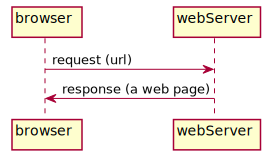

In [3]:
%%plantuml
@startuml
browser -> webServer:request (url)
webServer -> browser:response (a web page)
@enduml

## 1.3 uri

### 1.3.1 domain

* URI Uniform Resource Identifier 특정자원을 지칭하는 고유명사
* 형식
    ```
    scheme:[//[user:password@]host[:port]][/]path[?query][#fragment]
    ```

* 가운데 많이 쓰이는 인터넷주소 url (Uniform Resource Locator)
    * scheme에 http를 적는다. 예: http://www.smu.ac.kr
    * 도메인 네임
        * 영어로 된 도메인네임(www.smu.ac.kr)은 사람이, 컴퓨터는 숫자로 된 ip 주소
        * DNS에서 도메인네임을 ip주소로 변환한다.
    * 도메인에 전송되는 명령어 역할을 하는 params에서 설명

* 로컬 html 파일보기
    * 주소창에 '로컬파일 주소'를 형식에 맞추어 입력한다.
        ```
        file://host/path/to/html
        ```

    * Python webbrowser를 사용할 수 있다.
        * 로컬에 저장된 파일을 읽어오는 uri를 구성한다.
        * 'localhost'는 자신의 컴퓨터 명칭 'hostname'이다. 그 IP주소는 127.0.0.1이다.
        * 로컬파일을 부를 경우 'localhost'는 생략할 수 있다. 
            ```
            file://localhost/home/jsl/Code/src/mypage1.html
            file:///home/jsl/Code/src/mypage1.html
            ```

        * Python 웹브라우저webbrowser에서 파일을 여는 경우, **시간**이 좀 걸린다 (몇 초 정도)


In [18]:
%%writefile src/mypage1.html
<!DOCTYPE html>
<html>
<head>
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

Overwriting src/mypage1.html


* os.path.join()을 사용하여 디렉토리 구분자로 인한 오류를 막아준다.
* os.path.join()은 현재 작업디렉토리 'os.getcwd()' + 'src' + 'mypage1.html'을 합쳐 준다.

운영체제 | 디렉토리 구분자
-----|-----
윈도우 | ```\```
리눅스 | ```/```

In [1]:
import webbrowser
import os

myuri='file://'+'localhost'+os.path.join(os.getcwd(), 'src','mypage1.html')
#print myuri
webbrowser.open(myuri)

True

* 인터넷에서는 'UTF-8'을 사용한다. https://www.w3.org/International/questions/qa-choosing-encodings
* 한글을 깨지지 않게 하려면, meta charset을 utf-8로 지정한다.

In [2]:
%%writefile src/mypage2.html
<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

Overwriting src/mypage2.html


In [4]:
webbrowser.open(myuri)

True

* ipython notebook에서 html을 표현한다.
    * 셀에 내용을 입력하고 '%%html' 명령어를 사용한다.

In [3]:
%%HTML
<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
<title>My Home Page</title>
</head>
<body>
<h1>안녕하십니까</h1>
<p>오늘은 프로그래밍 하는 날...</p>
<p>Today we do programming...</p>
</body>
</html>

* 원격 url
    * 주소창에 http 프로토콜을 사용하여 url을 열 수 있다.
    * Python에 직접 하려면 webbrowser를 사용하면 된다.
        * google maps에 접속해서,
        * 'jongro gu hongji dong' 문자열을 입력한다.
        * 그리고 주소창의 domain과 그 뒤에 붙는 검색어를 보면 '/maps/place/'에 주소가 '+'로 연결되어 있다.

In [32]:
#브라우저에서 지도 열기
import webbrowser
myurl='https://www.google.co.kr/maps/place/Hongji-dong,+Jongno-gu,+Seoul/'
webbrowser.open(myurl)

True

### 1.3.2 params

* query string은 다음과 같이 구성한다.
```
http://example.com/over/there?name=ferret
```
* web form을 사용할 경우 query string
    * field와 값을 한 쌍으로 구성, field=value
    * 구분자는 & (또는 세미콜론 ;)
```
field1=value1&field2=value2&field3=value3...
```

* 위 지도를 열 경우와 같이, 검색어를 '+'로 붙여 쓰기도 한다.

In [9]:
import urllib
params = urllib.urlencode({"a":4,"b":20,"c":2016,"d":6,"e":30,"f":2016,"s":"^KS11"})
print params

a=4&c=2016&b=20&e=30&d=6&f=2016&s=%5EKS11


* URL 인코딩
    * 인터넷에서는 ASCII문자를 사용한다.
    * 특수문자는 '%xx', 즉'%'와 그 뒤 16진수로 문자로 부호화 한다.
        * 공백의 경우 '+' 또는 '%20'으로 표현한다.
        * '#'은 '%23'으로 표현된다.
    * quote()를 사용 (참조, ds_REST.ipynb)

* 구글 검색에서의 params
    * python을 검색하는 경우
```
https://www.google.co.kr/#q=python
https://www.google.co.kr/search?q=python
```

    * 'python tutorial'을 검색할 경우
```
https://www.google.co.kr/#q=python+tutorial
```

In [1]:
import urllib
params = urllib.urlencode({"#q": "python tutorial"})
print params

%23q=python+tutorial


In [15]:
print urllib.quote('~');
print urllib.quote('~', safe='~');

%7E
~


In [17]:
print urllib.quote(' ')
print urllib.quote_plus(' ')

%20
+


In [11]:
url = 'http://www.google.com/#q='
print url + urllib.quote_plus('python tutorial')

http://www.google.com/#q=python+tutorial


## 1.4 url 가져오기

### 1.4.1 library

* urllib - handles opening and reading URLs
    * Python 3.x에서 urllib를 개정해서 1) urllib.request, 2) urllib.parse, 3) urllib.error로 나눔.
    * 제공하는 기능이 서로 차이가 있어, urllib과 urllib2를 같이 사용하기도 한다.

구분 | 차이
-----|-----
urllib | GET query를 생성하기 위한 urlencode()를 사용할 수 있다.
urllib2 | 'Request'를 사용할 수 있다.

* httplib - handles http requests, urllib내부에서 사용하고 있슴.
* requests - web page가져오거나, API를 사용할 때. 아래는 서로 같은 기능을 한다.
```
urllib2.urlopen(url).read()
requests.get(url).text
```

* urllib2에서 페이지 가져오는 함수 urlopen()
* 사용하고 close() 한다.

In [5]:
import urllib2
response = urllib2.urlopen("https://www.python.org/")
html=response.read()
response.close()

* urllib2 라이브러리는 Request를 사용할 수 있다.
* response의 결과 html을 500자만 읽어서 확인했다.

In [26]:
import urllib2
url = 'http://www.python.org'
request = urllib2.Request(url)
response = urllib2.urlopen(request)
html = response.read()
print html[:500]

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqu


### 1.4.2 HTTP errors

* urllib2.HTTPError 또는 urllib2.URLError
* error.code (참조 https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)

코드 | 구분 | 예
-----|-----|-----
1xx | Informational | 
2xx | Success | 200 OK, 201 Created, 202 Accepted
3xx | Redirection | 
4xx | 클라이언트 오류 | 400 Bad Request, 404 Not Found
5xx | 서버 오류 | 500 Internal Server Error

* 오류의 처리
    * 오류가 발생하였는지 try, except문으로 처리할 수 있다.
    * html에 저장된 내용이 없는 경우 'None'으로 확인할 수 있다.

In [27]:
req = urllib2.Request('http://www.python.org/fish.html')

try:
    response=urllib2.urlopen(req)
except urllib2.HTTPError, e:
    print e.code, e.reason

404 OK


In [28]:
if html is None:
    print("URL is not found")
else:
    print "html has something!"

html has something!


## 1.5 BeautifulSoup

* 많이 사용되는 Python 라이브러리
* html, xml을 파싱할 수 있다.
* 이전 버전은 더 이상 지원되지 않으므로, 버전은 4로 한다.
```
pip install beautifulsoup4
```

* 파서를 넣어주지 않으면 기본 파서를 사용한다.

파서 | 설정
-----|-----
Python html.parser | BeautifulSoup(markup, "html.parser")
lxml parser | BeautifulSoup(markup, "lxml")

* requests로 url의 페이지를 가져와서, 그 페이지를 BeautifulSoup으로 parsing한다.
* class 다음에는 _를 넣어 준다. 또는 key-value 형식으로 맞추어 준다.

In [5]:
from bs4 import BeautifulSoup
import requests
page = requests.get("https://www.python.org/")
soup = BeautifulSoup(page.content)
print soup.title
print soup.find_all('div',class_="do-not-print", id="top")

<title>Welcome to Python.org</title>
[<div class="top-bar do-not-print" id="top">\n<nav class="meta-navigation container" role="navigation">\n<div class="skip-link screen-reader-text">\n<a href="#content" title="Skip to content">Skip to content</a>\n</div>\n<a aria-hidden="true" class="jump-link" href="#python-network" id="close-python-network">\n<span aria-hidden="true" class="icon-arrow-down"><span>\u25bc</span></span> Close\n                </a>\n<ul class="menu" role="tree">\n<li class="python-meta current_item selectedcurrent_branch selected">\n<a class="current_item selectedcurrent_branch selected" href="/" title="The Python Programming Language">Python</a>\n</li>\n<li class="psf-meta ">\n<a href="/psf-landing/" title="The Python Software Foundation">PSF</a>\n</li>\n<li class="docs-meta ">\n<a href="https://docs.python.org" title="Python Documentation">Docs</a>\n</li>\n<li class="pypi-meta ">\n<a href="https://pypi.python.org/" title="Python Package Index">PyPI</a>\n</li>\n<li cl

In [12]:
print soup.find_all('div',{'class': 'do-not-print','id':'top'})

[<div class="top-bar do-not-print" id="top">\n<nav class="meta-navigation container" role="navigation">\n<div class="skip-link screen-reader-text">\n<a href="#content" title="Skip to content">Skip to content</a>\n</div>\n<a aria-hidden="true" class="jump-link" href="#python-network" id="close-python-network">\n<span aria-hidden="true" class="icon-arrow-down"><span>\u25bc</span></span> Close\n                </a>\n<ul class="menu" role="tree">\n<li class="python-meta current_item selectedcurrent_branch selected">\n<a class="current_item selectedcurrent_branch selected" href="/" title="The Python Programming Language">Python</a>\n</li>\n<li class="psf-meta ">\n<a href="/psf-landing/" title="The Python Software Foundation">PSF</a>\n</li>\n<li class="docs-meta ">\n<a href="https://docs.python.org" title="Python Documentation">Docs</a>\n</li>\n<li class="pypi-meta ">\n<a href="https://pypi.python.org/" title="Python Package Index">PyPI</a>\n</li>\n<li class="jobs-meta ">\n<a href="/jobs/" t

* a link의 href를 구할 수 있다.

In [11]:
for counter,link in enumerate(soup.find_all('a')):
    if(counter<20):
        print counter,link.get('href')

0 #content
1 #python-network
2 /
3 /psf-landing/
4 https://docs.python.org
5 https://pypi.python.org/
6 /jobs/
7 /community/
8 #top
9 /
10 #site-map
11 #
12 javascript:;
13 javascript:;
14 javascript:;
15 #
16 http://plus.google.com/+Python
17 http://www.facebook.com/pythonlang?fref=ts
18 http://twitter.com/ThePSF
19 /community/irc/


## 웹데이터-1: python.org 페이지를 크롤링해서 http url 출력하기

* 사용자가 웹브라우저 주소창에 url을 입력하고 웹페이지를 요청하는 것과 같이 Python.org페이지를 크롤링해 온다.
* 다음 방식으로 해 본다.
    * BeautifulSoup

### BeautifulSoup

* 태그를 파싱하는 라이브러리
* 설치를 하지 않았다면:
    * 윈도우 아나콘다창 또는 맥/리눅스 Terminal에서 설치를 한다. 'sudo'는 관리자 권한이다.
    ```
    sudo pip install BeautifulSoup
    ```

* 위 예제, p 태그의 처음에 있는 strong 태그 가져오기
* 파서parser, lxml을 추가한다.

In [1]:
import urllib
uResponse = urllib.urlopen('http://python.org/')
_html = uResponse.read()
print len(_html)

47425


In [2]:
from bs4 import BeautifulSoup
tree=BeautifulSoup(_html, "lxml")
strongtags=tree('strong')
for tag in strongtags:
    print tag

<strong>Notice:</strong>
<strong><small>A</small> A</strong>
<strong>relaunched community-run job board</strong>


* urllib을 사용해서, html을 가져온다.
* 20개만 출력한다. 전체 개수는 맨 마지막 줄에 출력한다.

In [3]:
from urllib import urlopen
from bs4 import BeautifulSoup
#_html = urlopen("http://en.wikipedia.org/wiki/Kevin_Bacon")
_html = urlopen("http://en.wikipedia.org/wiki/HTML").read()
tree = BeautifulSoup(_html, "lxml")
counter=0
for link in tree.findAll("a"):
    if 'href' in link.attrs:
        if counter<20:
            print counter, link.attrs['href']
        counter+=1
print "Total: ", counter

0 /wiki/Wikipedia:Protection_policy#semi
1 #mw-head
2 #p-search
3 /wiki/HTM_(disambiguation)
4 /wiki/Help:HTML_in_wikitext
5 /wiki/File:HTML.svg
6 /wiki/Filename_extension
7 /wiki/Media_type
8 /wiki/Type_code
9 /wiki/World_Wide_Web_Consortium
10 /wiki/WHATWG
11 /wiki/Software_release_life_cycle
12 /wiki/HTML5
13 /wiki/Document_file_format
14 /wiki/Standard_Generalized_Markup_Language
15 /wiki/XHTML
16 /wiki/International_standard
17 http://www.w3.org/TR/html/
18 http://whatwg.org/html
19 http://www.w3.org/TR/html51/
Total:  1610
